### CONEXIÓN Y ARMADO DE TABLA

In [1]:
import pandas as pd 
import numpy as np 
import pyodbc
from datetime import datetime 
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
import pingouin as pg

In [4]:
#pip install openpyxl

In [5]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=BCRRBM00;'
                      'Database=BD_IFRS9_estudio;'
                      'Trusted_Connection=yes;')
conn
cursor = conn.cursor()

D:\PythonEnvs\gmesaenv\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [6]:
q001=( ''' 
select Matricula, avg_cant_news, Avg_Nro_calls, Avg_Nro_Gest, Avg_Nro_visits, Cant_mes, ANT_MONTH
from  [BD_IFRS9_estudio].[mcr].[DESEMBOLSOS_FUNC_MES_2]  
WHERE FEC_MES = '202204'
''')
df1= pd.read_sql(q001,conn)

In [7]:
df_ind_func= pd.read_excel("D:/Marisa Baldellon/01 PROYECTOS 2022/02 COBRANZAS MICROCREDITOS/HistoricoRV2021_2022_Compartir.xlsx", header = 1 )

In [8]:
df_ind_func.head(1)

,MES,MATRICULA,OFICINA,Ciudad,Clientes,Cartera,Cliente Act.,Cart Activos,Sdo Mora,% MORA,%Reso 0,<=14,<=42,>42,Total,Des,Mora,Acel,Total.1
0,202203,S50887,OF. MIC. CENTRO LA PAZ,LA PAZ,153,4.739036e+06,142,4.437243e+06,52604.490666,0.0111,0.956762,5.0,1.0,1.0,7.0,0.151579,0.131245,0.0,0.282825


In [9]:
df1.shape

(63, 7)

In [10]:
RENDIMIENTO_FFNN = df_ind_func[df_ind_func.MES >= 202201].groupby(["MATRICULA"]).mean()
RENDIMIENTO_FFNN.drop("MES",axis = 1, inplace = True)
RENDIMIENTO_FFNN.reset_index(inplace=True)

In [11]:
RENDIMIENTO_FFNN.shape

(75, 16)

In [12]:
RENDIMIENTO_FFNN.columns

Index(['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.', 'Cart Activos',
       'Sdo Mora', '% MORA', '%Reso 0', '<=14', '<=42', '>42', 'Total', 'Des',
       'Mora', 'Acel', 'Total.1'],
      dtype='object')

In [13]:
RENDIMIENTO_FFNN[RENDIMIENTO_FFNN.MATRICULA == 'S68842']

,MATRICULA,Clientes,Cartera,Cliente Act.,Cart Activos,Sdo Mora,% MORA,%Reso 0,<=14,<=42,>42,Total,Des,Mora,Acel,Total.1
16,S68842,161.666667,5.380991e+06,150.333333,5.177590e+06,135998.926504,0.025458,0.951929,4.666667,2.0,2.0,8.666667,0.318389,0.103018,0.118158,0.539565


In [14]:
RENDIMIENTO_FFNN.head()

,MATRICULA,Clientes,Cartera,Cliente Act.,Cart Activos,Sdo Mora,% MORA,%Reso 0,<=14,<=42,>42,Total,Des,Mora,Acel,Total.1
0,S23401,135.333333,5.314183e+06,127.333333,4.983615e+06,620507.947925,0.116290,0.958536,1.666667,2.333333,2.000000,6.000000,0.084504,0.093104,0.000000,0.177608
1,S24623,160.666667,5.681431e+06,150.333333,5.189746e+06,479592.526513,0.084163,0.944011,2.666667,1.666667,2.666667,7.000000,0.246483,0.044981,0.000000,0.291464
2,S32188,151.000000,5.490909e+06,139.333333,5.172694e+06,119966.215847,0.021842,0.983972,3.333333,4.333333,0.666667,8.333333,0.257552,0.123840,0.134474,0.515867
3,S40253,126.666667,5.007495e+06,118.666667,4.750598e+06,41536.663392,0.008155,0.972837,3.333333,1.666667,2.000000,7.000000,0.180771,0.185812,0.038731,0.405314
4,S49346,138.000000,4.489131e+06,127.666667,4.164849e+06,326752.847115,0.073013,0.990071,3.000000,3.000000,1.333333,7.333333,0.204922,0.132458,0.038731,0.376111


In [15]:
RENDIMIENTO_FFNN = RENDIMIENTO_FFNN[['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.',
       'Cart Activos', 'Sdo Mora', '% MORA', '%Reso 0', 'Total', 'Des', 'Mora', 'Acel', 'Total.1']]

In [16]:
RENDIMIENTO_FFNN_2 = pd.merge(RENDIMIENTO_FFNN,df1,how = 'inner',left_on ='MATRICULA'  ,  right_on= 'Matricula'  )
RENDIMIENTO_FFNN_2.head(2)

,MATRICULA,Clientes,Cartera,Cliente Act.,Cart Activos,Sdo Mora,% MORA,%Reso 0,Total,Des,Mora,Acel,Total.1,Matricula,avg_cant_news,Avg_Nro_calls,Avg_Nro_Gest,Avg_Nro_visits,Cant_mes,ANT_MONTH
0,S23401,135.333333,5.314183e+06,127.333333,4.983615e+06,620507.947925,0.116290,0.958536,6.0,0.084504,0.093104,0.0,0.177608,S23401,5.0,12.0,13.0,0.0,4,118
1,S24623,160.666667,5.681431e+06,150.333333,5.189746e+06,479592.526513,0.084163,0.944011,7.0,0.246483,0.044981,0.0,0.291464,S24623,6.0,47.0,64.0,13.0,4,117


In [17]:
RENDIMIENTO_FFNN_2.columns

Index(['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.', 'Cart Activos',
       'Sdo Mora', '% MORA', '%Reso 0', 'Total', 'Des', 'Mora', 'Acel',
       'Total.1', 'Matricula', 'avg_cant_news', 'Avg_Nro_calls',
       'Avg_Nro_Gest', 'Avg_Nro_visits', 'Cant_mes', 'ANT_MONTH'],
      dtype='object')

In [18]:
RENDIMIENTO_FFNN_2.shape

(62, 20)

In [19]:
#RENDIMIENTO_FFNN_2= RENDIMIENTO_FFNN_2[['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.', 'Cart Activos',
#       'Sdo Mora', '% MORA', '%Reso 0', 'Total', 'Des', 'Mora', 'Acel',
#       'Total.1',   'Avg_Nro_calls', 'Avg_Nro_Gest', 'Avg_Nro_visits', 'ANT_MONTH']]
RENDIMIENTO_FFNN_2= RENDIMIENTO_FFNN_2[['MATRICULA', 
#                                        'Cliente Act.', 'Cart Activos',
          '% MORA' , 
                                        'Total',
          'Avg_Nro_calls', 'Avg_Nro_visits', 'ANT_MONTH']]

In [20]:
RENDIMIENTO_FFNN_2.columns

Index(['MATRICULA', '% MORA', 'Total', 'Avg_Nro_calls', 'Avg_Nro_visits',
       'ANT_MONTH'],
      dtype='object')

In [21]:
RENDIMIENTO_FFNN_2.shape

(62, 6)

In [22]:
#RENDIMIENTO_FFNN_3 = RENDIMIENTO_FFNN_2.drop(RENDIMIENTO_FFNN_2[RENDIMIENTO_FFNN_2["MATRICULA"] == 'T18953'].index)

In [23]:
#RENDIMIENTO_FFNN_3.shape

In [24]:
RENDIMIENTO_FFNN_4 = RENDIMIENTO_FFNN_2.drop(["MATRICULA"], axis= 1)

In [25]:
RENDIMIENTO_FFNN_4.isnull().sum()

% MORA            0
Total             0
Avg_Nro_calls     1
Avg_Nro_visits    1
ANT_MONTH         0
dtype: int64

In [26]:
RENDIMIENTO_FFNN_4.shape

(62, 5)

In [27]:
RENDIMIENTO_FFNN_4 = RENDIMIENTO_FFNN_4.fillna(0)

### CLUSTERIZACIÓN

In [28]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [29]:
#pip install kneed

In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(RENDIMIENTO_FFNN_4)

In [31]:
RENDIMIENTO_FFNN_4.columns

Index(['% MORA', 'Total', 'Avg_Nro_calls', 'Avg_Nro_visits', 'ANT_MONTH'], dtype='object')

In [32]:
COLUMNS_RENDIMIENTO_FFNN_4 = RENDIMIENTO_FFNN_4.columns

In [33]:
df_scaled = pd.DataFrame(scaled_features, columns=COLUMNS_RENDIMIENTO_FFNN_4)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,% MORA,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH
0,1.168311,-0.271132,-0.543961,-0.619740,2.789142
1,0.526036,0.223285,1.700137,2.371339,2.751508
2,-0.719879,0.882508,0.546029,0.300592,2.450439
3,-0.993506,0.223285,-0.736312,-0.619740,0.756923
4,0.303134,0.388091,-0.223376,-0.619740,1.509596


In [34]:
kmeans_kwargs = {
      "init": "random",
      "n_init": 10,
      "max_iter": 300,
      "random_state": 42,
  }

 

In [35]:
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(df_scaled)
        sse.append(kmeans.inertia_)

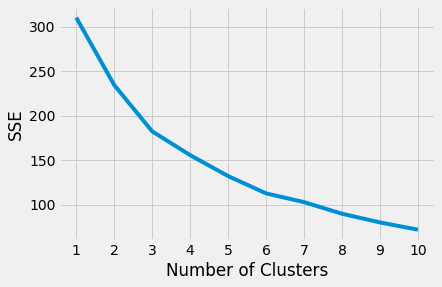

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=123)
pred_y = kmeans.fit_predict(df_scaled)


In [38]:
kmeans

KMeans(n_clusters=3, random_state=123)

In [39]:
df_scaled

,% MORA,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH
0,1.168311,-0.271132,-0.543961,-0.619740,2.789142
1,0.526036,0.223285,1.700137,2.371339,2.751508
2,-0.719879,0.882508,0.546029,0.300592,2.450439
3,-0.993506,0.223285,-0.736312,-0.619740,0.756923
4,0.303134,0.388091,-0.223376,-0.619740,1.509596
...,...,...,...,...,...
57,-0.752683,-2.496008,-0.415727,-0.389657,-1.576366
58,0.328937,-1.012757,-1.313366,-0.619740,-1.576366
59,3.562954,-1.259966,-0.287493,0.300592,-1.614000
60,-0.874519,-2.248799,0.033093,-0.159574,-1.614000


In [40]:
kmeans.cluster_centers_

array([[ 0.67137046, -0.90563351, -0.37725669, -0.17107783, -0.85568078],
       [-0.47459445,  0.4485194 , -0.38794287, -0.42800383,  0.38811257],
       [ 0.06753536,  0.38809067,  1.59861832,  1.35513929,  0.45585321]])

In [41]:
kmeans.cluster_centers_

array([[ 0.67137046, -0.90563351, -0.37725669, -0.17107783, -0.85568078],
       [-0.47459445,  0.4485194 , -0.38794287, -0.42800383,  0.38811257],
       [ 0.06753536,  0.38809067,  1.59861832,  1.35513929,  0.45585321]])

In [42]:
RENDIMIENTO_FFNN_2["CLUS"] = pred_y

In [43]:
RENDIMIENTO_FFNN_2

,MATRICULA,% MORA,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH,CLUS
0,S23401,0.116290,6.000000,12.0,0.0,118,1
1,S24623,0.084163,7.000000,47.0,13.0,117,2
2,S32188,0.021842,8.333333,29.0,4.0,109,1
3,S40253,0.008155,7.000000,9.0,0.0,64,1
4,S49346,0.073013,7.333333,17.0,0.0,84,1
...,...,...,...,...,...,...,...
57,T18952,0.020201,1.500000,14.0,1.0,2,0
58,T18953,0.074304,4.500000,NaN,NaN,2,0
59,T20035,0.236072,4.000000,16.0,4.0,1,0
60,T20040,0.014106,2.000000,21.0,2.0,1,0


In [44]:
RENDIMIENTO_FFNN_2.shape

(62, 7)

In [45]:
RENDIMIENTO_FFNN_2.shape

(62, 7)

In [46]:
conditionlist = [
    (RENDIMIENTO_FFNN_2['CLUS'] == 0) ,
    (RENDIMIENTO_FFNN_2['CLUS'] == 1) ,
    (RENDIMIENTO_FFNN_2['CLUS'] == 2)]
choicelist = ['1', '2', '0']
RENDIMIENTO_FFNN_2['CLUS_FIN'] = np.select(conditionlist, choicelist, default='Not Specified')

In [47]:
RENDIMIENTO_FFNN_2.CLUS.value_counts()

1    30
0    20
2    12
Name: CLUS, dtype: int64

In [48]:
RENDIMIENTO_FFNN_2.CLUS.value_counts()

1    30
0    20
2    12
Name: CLUS, dtype: int64

In [49]:
RENDIMIENTO_FFNN_2.CLUS_FIN.value_counts()

2    30
1    20
0    12
Name: CLUS_FIN, dtype: int64

In [50]:
##RENDIMIENTO_FFNN_3.to_csv("FFNN_CLUS_REPRO.csv")

#### CENTROIDES

In [57]:
RENDIMIENTO_FFNN_4['CLUS'].value_counts(normalize=True)*100

0    44.262295
2    36.065574
1    19.672131
Name: CLUS, dtype: float64

In [58]:
RENDIMIENTO_FFNN_4['CLUS'].value_counts()

0    27
2    22
1    12
Name: CLUS, dtype: int64

In [59]:
RENDIMIENTO_FFNN_4['CLUS'].count()

61

In [69]:
RENDIMIENTO_FFNN_4

,% MORA,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH,CLUS
0,0.116290,6.000000,12.0,0.0,118,0
1,0.084163,7.000000,47.0,13.0,117,1
2,0.021842,8.333333,29.0,4.0,109,0
3,0.008155,7.000000,9.0,0.0,64,0
4,0.073013,7.333333,17.0,0.0,84,0
...,...,...,...,...,...,...
56,0.000365,3.666667,4.0,0.0,3,2
57,0.020201,1.500000,14.0,1.0,2,2
59,0.236072,4.000000,16.0,4.0,1,2
60,0.014106,2.000000,21.0,2.0,1,2


In [99]:
RENDIMIENTO_FFNN_4.columns

Index(['% MORA', 'Total', 'Avg_Nro_calls', 'Avg_Nro_visits', 'ANT_MONTH'], dtype='object')

In [53]:
RENDIMIENTO_FFNN_2.groupby("CLUS").agg({
    'Total' : ["count" ,"median" , "std",] , 
    'Avg_Nro_calls': ["median" , "std"], 
    'Avg_Nro_visits': ["median" , "std"], 
    'ANT_MONTH' :  ["median" , "std"],
    '% MORA' :  ["median" , "std","max","min"]
})

Total                     Avg_Nro_calls            Avg_Nro_visits  \
     count    median       std        median        std         median   
CLUS                                                                     
0       20  5.166667  2.212471          14.0   8.374634            1.0   
1       30  7.333333  1.166201          12.0   7.972726            0.0   
2       12  7.166667  1.414214          46.0  15.078331            7.0   

               ANT_MONTH               % MORA                                
           std    median        std    median       std       max       min  
CLUS                                                                         
0     2.391505      10.5  22.499766  0.090610  0.066361  0.257943  0.000365  
1     1.533158      48.0  21.457898  0.024079  0.028310  0.116290  0.003455  
2     6.501165      52.5  22.389121  0.057326  0.027982  0.113644  0.030384

In [139]:
#print(np.percentile(RENDIMIENTO_FFNN_4["Total"], 25))
#print(np.percentile(RENDIMIENTO_FFNN_4["Total"], 50))
#print(np.percentile(RENDIMIENTO_FFNN_4["Total"], 75))
#print(np.percentile(RENDIMIENTO_FFNN_4["Total"], 100))
      

In [67]:
RENDIMIENTO_FFNN_4.groupby('CLUS').quantile([0,0.50,0.75,1])

% MORA      Total  Avg_Nro_calls  Avg_Nro_visits  ANT_MONTH
CLUS                                                                    
0    0.00  0.003455   6.000000            5.0            0.00      34.00
     0.50  0.022699   7.666667           12.0            0.00      48.00
     0.75  0.048441   8.333333           19.0            1.50      63.00
     1.00  0.116290  10.000000           32.0            5.00     118.00
1    0.00  0.030384   4.000000           22.0            1.00      30.00
     0.50  0.057326   7.166667           46.0            7.00      52.50
     0.75  0.077048   8.416667           47.5           12.25      61.75
     1.00  0.113644   9.333333           74.0           23.00     117.00
2    0.00  0.000365   0.333333            4.0            0.00       1.00
     0.50  0.083869   5.333333           14.5            1.00      27.50
     0.75  0.113001   6.583333           20.5            2.00      35.50
     1.00  0.257943   7.666667           32.0            8.00      72.00

In [68]:
RENDIMIENTO_FFNN_4.groupby("CLUS").agg({
    'Total' : ["count" ,"mean" , "std"] , 
    'Avg_Nro_calls': ["mean" , "std"], 
    'Avg_Nro_visits': ["mean" , "std"], 
    'ANT_MONTH' :  ["mean" , "std"],
    'Mora' :  ["mean" , "std"]
})

KeyError: "Column(s) ['Mora'] do not exist"

In [46]:
RENDIMIENTO_FFNN_4.max()

Mora                0.29171
Total              10.00000
Avg_Nro_calls      80.00000
Avg_Nro_visits     25.00000
ANT_MONTH         118.00000
CLUS                2.00000
dtype: float64

In [47]:
RENDIMIENTO_FFNN_4.shape

(59, 6)

In [48]:
RENDIMIENTO_FFNN_4.CLUS.unique()

array([1, 2, 0])

In [49]:
RENDIMIENTO_FFNN_3.shape

(59, 6)

In [50]:
RENDIMIENTO_FFNN_4.head(1)

,Mora,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH,CLUS
0,0.093104,6.0,14.0,0.0,118,1


In [51]:
RENDIMIENTO_FFNN_3.head(1)

,MATRICULA,Mora,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH
0,S23401,0.093104,6.0,14.0,0.0,118


In [52]:
pred_y

array([1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=3, random_state=123)>

In [54]:
RENDIMIENTO_FFNN_4.shape

(59, 6)

#### SAVE SCALER AND MODEL TO PREDICT

In [142]:
 #SAVE SCALER
import pickle
scalerfile = 'scaler_clus_func_mcr_repro.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [143]:
 #SAVE MODEL
import pickle
modelfile = 'model_clus_func_repro.sav'
pickle.dump(kmeans, open(modelfile, 'wb'))

#### Para predecir

In [66]:
import pandas as pd 
import pickle 

In [35]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=BCRRBM00;'
                      'Database=BD_IFRS9_estudio;'
                      'Trusted_Connection=yes;')
conn
cursor = conn.cursor()

In [36]:
q1=( ''' 
select Matricula, avg_cant_news, Avg_Nro_calls, Avg_Nro_Gest, Avg_Nro_visits, Cant_mes, ANT_MONTH
from  [BD_IFRS9_estudio].[mcr].[DESEMBOLSOS_FUNC_MES_2]  
WHERE Matricula in ('T18952','T18953','T20043')

''')
gt= pd.read_sql(q1,conn)

In [37]:
gt

,Matricula,avg_cant_news,Avg_Nro_calls,Avg_Nro_Gest,Avg_Nro_visits,Cant_mes,ANT_MONTH
0,T18952,1,14.0,15.0,1.0,1,2
1,T18953,1,NaN,NaN,NaN,1,2
2,T20043,1,9.0,11.0,2.0,1,1


In [38]:
df_ind_func= pd.read_excel("D:/Marisa Baldellon/01 PROYECTOS 2022/02 COBRANZAS MICROCREDITOS/HistoricoRV2021_2022_Compartir.xlsx", header = 1 )

In [39]:
df_ind_func.head(1)

,MES,MATRICULA,OFICINA,Ciudad,Clientes,Cartera,Cliente Act.,Cart Activos,Sdo Mora,% MORA,%Reso 0,<=14,<=42,>42,Total,Des,Mora,Acel,Total.1
0,202203,S50887,OF. MIC. CENTRO LA PAZ,LA PAZ,153,4.739036e+06,142,4.437243e+06,52604.490666,0.0111,0.956762,5.0,1.0,1.0,7.0,0.151579,0.131245,0.0,0.282825


In [41]:
RENDIMIENTO_FFNN = df_ind_func[df_ind_func.MES >= 202201].groupby(["MATRICULA"]).mean()
RENDIMIENTO_FFNN.drop("MES",axis = 1, inplace = True)
RENDIMIENTO_FFNN.reset_index(inplace=True)

In [42]:
RENDIMIENTO_FFNN.shape

(75, 16)

In [43]:
RENDIMIENTO_FFNN = RENDIMIENTO_FFNN[['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.',
       'Cart Activos', 'Sdo Mora', '% MORA', '%Reso 0', 'Total', 'Des', 'Mora', 'Acel', 'Total.1']]

In [44]:
RENDIMIENTO_FFNN_2 = pd.merge(RENDIMIENTO_FFNN,gt,how = 'inner',left_on ='MATRICULA'  ,  right_on= 'Matricula'  )
RENDIMIENTO_FFNN_2.head(2)

,MATRICULA,Clientes,Cartera,Cliente Act.,Cart Activos,Sdo Mora,% MORA,%Reso 0,Total,Des,Mora,Acel,Total.1,Matricula,avg_cant_news,Avg_Nro_calls,Avg_Nro_Gest,Avg_Nro_visits,Cant_mes,ANT_MONTH
0,T18952,43.5,1.499067e+06,40.5,1.441446e+06,60564.204918,0.020201,0.490217,1.5,0.000000,0.016043,0.0,0.016043,T18952,1,14.0,15.0,1.0,1,2
1,T18953,73.5,2.539081e+06,68.0,2.456131e+06,189403.505144,0.074304,0.969653,4.5,0.052815,0.051445,0.0,0.104260,T18953,1,NaN,NaN,NaN,1,2


In [45]:
RENDIMIENTO_FFNN_2.columns

Index(['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.', 'Cart Activos',
       'Sdo Mora', '% MORA', '%Reso 0', 'Total', 'Des', 'Mora', 'Acel',
       'Total.1', 'Matricula', 'avg_cant_news', 'Avg_Nro_calls',
       'Avg_Nro_Gest', 'Avg_Nro_visits', 'Cant_mes', 'ANT_MONTH'],
      dtype='object')

In [46]:
RENDIMIENTO_FFNN_2.shape

(3, 20)

In [47]:
#RENDIMIENTO_FFNN_2= RENDIMIENTO_FFNN_2[['MATRICULA', 'Clientes', 'Cartera', 'Cliente Act.', 'Cart Activos',
#       'Sdo Mora', '% MORA', '%Reso 0', 'Total', 'Des', 'Mora', 'Acel',
#       'Total.1',   'Avg_Nro_calls', 'Avg_Nro_Gest', 'Avg_Nro_visits', 'ANT_MONTH']]
RENDIMIENTO_FFNN_2= RENDIMIENTO_FFNN_2[['MATRICULA',                                       
          'Mora' ,    'Total',
          'Avg_Nro_calls', 'Avg_Nro_visits', 'ANT_MONTH']]

In [62]:
func_to_pred = RENDIMIENTO_FFNN_2[[                           
          'Mora' , 
                                        'Total',
          'Avg_Nro_calls', 'Avg_Nro_visits', 'ANT_MONTH']]
func_to_pred =func_to_pred.fillna(0)


In [52]:
## ADD MEASURED INDICATORS FROM FUNCIONARIO
#func_to_pred = pd.DataFrame({'Mora': [0.074], 
#              'Total': [4.5],
#              'Avg_Nro_calls': [0], 
#              'Avg_Nro_visits': [0],
#             'ANT_MONTH': [2]}
#             )
#func_to_pred

,Mora,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH
0,0.074,4.5,0,0,2


In [63]:
### LOAD SCALER
import pickle
scalerfile = 'scaler_clus_func_mcr.sav'
scaler_2 = pickle.load(open(scalerfile, 'rb'))
test_scaled_set = scaler_2.transform(func_to_pred)
test_scaled_set

array([[-1.30256866, -2.72466705, -0.39375849, -0.3658932 , -1.73153832],
       [-0.73678962, -1.15632211, -1.1644801 , -0.55693478, -1.73153832],
       [-1.36481716, -1.41771294, -0.66901621, -0.17485162, -1.77086117]])

In [64]:
df_scaled_to_predict = pd.DataFrame(test_scaled_set, columns=['Mora', 'Total', 'Avg_Nro_calls', 'Avg_Nro_visits', 'ANT_MONTH'])

In [65]:
# LOAD MODEL
model_clus = 'model_clus_func.sav'
loaded_model = pickle.load(open(model_clus, 'rb'))

In [66]:
test_scaled_set

array([[-1.30256866, -2.72466705, -0.39375849, -0.3658932 , -1.73153832],
       [-0.73678962, -1.15632211, -1.1644801 , -0.55693478, -1.73153832],
       [-1.36481716, -1.41771294, -0.66901621, -0.17485162, -1.77086117]])

In [68]:
# PREDICT
pred_y =loaded_model.predict(test_scaled_set)

In [70]:
RENDIMIENTO_FFNN_2["CLUS"] = pred_y

In [71]:
RENDIMIENTO_FFNN_2

,MATRICULA,Mora,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH,CLUS
0,T18952,0.016043,1.5,14.0,1.0,2,0
1,T18953,0.051445,4.5,NaN,NaN,2,0
2,T20043,0.012147,4.0,9.0,2.0,1,0


In [74]:
clus = pd.read_csv("CLUS_FUNC.csv")
clus 

,MATRICULA,Mora,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH,CLUS
0,S23401,0.093104,6.000000,14,0,118,1
1,S24623,0.044981,7.000000,60,18,117,2
2,S32188,0.123840,8.333333,34,5,109,2
3,S40253,0.185812,7.000000,8,0,64,1
4,S49346,0.132458,7.333333,15,0,84,1
5,S50887,0.177681,7.666667,15,2,82,1
6,S52756,0.218688,8.000000,22,2,72,1
7,S59060,0.000000,0.333333,13,0,72,0
8,S59063,0.291710,7.666667,6,0,72,1
9,S60560,0.031052,7.666667,13,18,70,2


In [76]:
RENDIMIENTO_FFNN_2.columns


Index(['MATRICULA', 'Mora', 'Total', 'Avg_Nro_calls', 'Avg_Nro_visits',
       'ANT_MONTH', 'CLUS'],
      dtype='object')

In [77]:
clus.columns

Index(['MATRICULA', 'Mora', 'Total', 'Avg_Nro_calls', 'Avg_Nro_visits',
       'ANT_MONTH', 'CLUS'],
      dtype='object')

In [82]:
CLUS_FINAL_62FUNC = pd.concat([RENDIMIENTO_FFNN_2,clus])
CLUS_FINAL_62FUNC

,MATRICULA,Mora,Total,Avg_Nro_calls,Avg_Nro_visits,ANT_MONTH,CLUS
0,T18952,0.016043,1.500000,14.0,1.0,2,0
1,T18953,0.051445,4.500000,NaN,NaN,2,0
2,T20043,0.012147,4.000000,9.0,2.0,1,0
0,S23401,0.093104,6.000000,14.0,0.0,118,1
1,S24623,0.044981,7.000000,60.0,18.0,117,2
...,...,...,...,...,...,...,...
54,T16417,0.026634,5.333333,5.0,0.0,4,0
55,T16418,0.006778,4.000000,13.0,4.0,4,0
56,T17407,0.025351,3.666667,3.0,0.0,3,0
57,T20035,0.014260,4.000000,10.0,0.0,1,0


In [83]:
CLUS_FINAL_62FUNC.to_csv("CLUS_FINAL_62FUNC.csv")

### INTERPRETACIÓN DE CLUSTERIZACION

In [ ]:
cluster_0 = RENDIMIENTO_FFNN_4[RENDIMIENTO_FFNN_4['CLUS'] == 0]
cluster_1 = RENDIMIENTO_FFNN_4[RENDIMIENTO_FFNN_4['CLUS'] == 1]
cluster_2 = RENDIMIENTO_FFNN_4[RENDIMIENTO_FFNN_4['CLUS'] == 2]
#cluster_3 = RENDIMIENTO_FFNN_4[RENDIMIENTO_FFNN_4['CLUS'] == 3]

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=RENDIMIENTO_FFNN_4['Total'],order=RENDIMIENTO_FFNN_4['Total'].value_counts().index,hue=RENDIMIENTO_FFNN_4['CLUS'])
plt.show()

In [ ]:
RENDIMIENTO_FFNN_4.columns

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=RENDIMIENTO_FFNN_4['Total'],order=RENDIMIENTO_FFNN_4['Total'].value_counts().index,hue=RENDIMIENTO_FFNN_4['CLUS'])
plt.show()

In [ ]:
cluster_1['Total'].value_counts(normalize=True)*100

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=RENDIMIENTO_FFNN_4['CLUS'],hue=RENDIMIENTO_FFNN_4['Total'])
plt.show()

In [ ]:
df1.columns

#### nuevos desembolsos

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_0['Total'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_1['Total'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_2['Total'])
plt.show()

#### llamadas

In [ ]:
cluster_0.columns

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_0['Avg_Nro_calls'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_1['Avg_Nro_calls'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_2['Avg_Nro_calls'])
plt.show()

#### Visitas

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_0['Avg_Nro_visits'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_1['Avg_Nro_visits'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_2['Avg_Nro_visits'])
plt.show()

In [ ]:
61/12

#### Antiguedad

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_0['ANT_MONTH'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_1['ANT_MONTH'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=cluster_2['ANT_MONTH'])
plt.show()

### Análisis Cluster - Best Funcionarios

#### Cluster 0

In [ ]:
cluster_0.head(2)

In [ ]:
cluster_0.columns

In [ ]:
cluster_0[["Total"]].describe()

In [ ]:
#cluster_0[["MATRICULA","Total",'Avg_Nro_calls', 'Avg_Nro_visits']].sort_values(['Total'], ascending=[False])

In [ ]:
cluster_02 =cluster_0[["Total",'Avg_Nro_calls', 'Avg_Nro_visits']]
cluster_12 =cluster_1[["Total",'Avg_Nro_calls', 'Avg_Nro_visits']]
cluster_22 =cluster_2[["Total",'Avg_Nro_calls', 'Avg_Nro_visits']]

In [ ]:
display(pg.corr(cluster_02['Avg_Nro_calls'], cluster_02['Total'], method='pearson'))

display(pg.corr(cluster_02['Avg_Nro_visits'], cluster_02['Total'], method='pearson'))

In [ ]:
#cluster_02["DR"] = np.where((cluster_02['Total']>=6)&(cluster_02['Nro_Gest']<=33), 'TOP', 'BOT') 
#cluster_02.sort_values(['Total'], ascending=[False]).head(30)

In [ ]:
cluster_02["DR"] = np.where((cluster_02['Total']>=7), 'TOP', 'BOT') 
cluster_02.sort_values(['Total'], ascending=[False]).head(30)

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 


In [ ]:
boxplot = cluster_02.boxplot(grid=False, rot=45, fontsize=15)  

In [ ]:
cluster_02.columns

In [ ]:
cluster_02[['Avg_Nro_calls', 'Avg_Nro_visits', 'DR']].boxplot(by='DR', figsize=(10, 6))

In [ ]:
cluster_02[['Total', 'DR']].boxplot(by='DR', figsize=(8, 6))

In [ ]:
print('TOP' , cluster_02[cluster_02["DR"] == "TOP"][["Total"]].median())

print('BOT' , cluster_02[cluster_02["DR"] == "BOT"][["Total"]].median())

print('TOP' , cluster_02[cluster_02["DR"] == "TOP"][["Avg_Nro_Gest"]].median())

print('BOT' , cluster_02[cluster_02["DR"] == "BOT"][["Avg_Nro_Gest"]].median())

In [ ]:
cluster_02[["Avg_Nro_Gest","Total"]].corr(method = 'spearman')

#### Cluster 1

In [ ]:
from scipy import stats
import numpy as np

#percentile=stats.scoreatpercentile(cluster_1[["Avg_Nro_Gest"]], 60)
#percentile

In [ ]:
percentile=stats.scoreatpercentile(cluster_1[["Total"]], 74)
percentile

In [ ]:
#cluster_1[["Matricula","Total","Avg_Nro_Gest",'Avg_Nro_calls', 'Avg_Nro_visits']].sort_values(['Total'], ascending=[False])

In [ ]:
#cluster_1[["Matricula","Total",'Avg_Nro_calls', 'Avg_Nro_visits']].corr()

In [ ]:
#cluster_1[["Matricula","Total","Avg_Nro_calls"]]

In [ ]:
cluster_1.columns

In [ ]:
cluster_12 =cluster_1[['Mora',"Total","Avg_Nro_calls",'Avg_Nro_visits']]

In [ ]:
cluster_1["Total"].describe()

In [ ]:
#cluster_12["DR"] = np.where((cluster_12['Total']>=6)&(cluster_12['Avg_Nro_Gest']<=37), 'TOP', 'BOT') 
#cluster_12.sort_values(['Total'], ascending=[False]).head(30)

In [ ]:
cluster_12["DR"] = np.where((cluster_12['Total']>=9), 'TOP', 'BOT') 
#cluster_12.sort_values(['Total'], ascending=[False]).head(30)

In [ ]:
#cluster_12 =cluster_1[["Matricula","Total","Avg_Nro_Gest"]]

In [ ]:
cluster_12.boxplot(by='DR', figsize=(10, 7))

In [ ]:
print('TOP' , cluster_12[cluster_12["DR"] == "TOP"][["Total"]].median())

print('BOT' , cluster_12[cluster_12["DR"] == "BOT"][["Total"]].median())

print('TOP' , cluster_12[cluster_12["DR"] == "TOP"][["Avg_Nro_Gest"]].median())

print('BOT' , cluster_12[cluster_12["DR"] == "BOT"][["Avg_Nro_Gest"]].median())

In [ ]:
1/12

In [ ]:
cluster_02[["Avg_Nro_Gest","Total"]].corr(method = 'spearman')

In [ ]:
cluster_12[["Avg_Nro_Gest","Total"]].corr(method = 'spearman')

In [ ]:
#cluster_22[["Avg_Nro_Gest","Total"]].corr(method = 'spearman')

In [ ]:
#plt.matshow(cluster_22[["Avg_Nro_Gest","Total"]].corr())

In [ ]:
#cluster_02 = cluster_02.fillna(0)
#cluster_12 = cluster_12.fillna(0)
#cluster_22 = cluster_22.fillna(0)

#### Cluster 2

In [ ]:
cluster_2[["Total"]].describe()

In [ ]:
#cluster_2[["Matricula","Total",'Avg_Nro_calls', 'Avg_Nro_visits']].sort_values(['Total'], ascending=[False])

In [ ]:
#cluster_2[["Matricula","Total",'Avg_Nro_calls', 'Avg_Nro_visits']].corr()

In [ ]:
#cluster_2[["Matricula","Total","Avg_Nro_calls"]]

In [ ]:
cluster_2.columns

In [ ]:
cluster_22 =cluster_2[["Total",'Avg_Nro_calls','Avg_Nro_visits', 'Mora']]

In [ ]:
#cluster_22["DR"] = np.where((cluster_22['Total']>=3)&(cluster_22['Avg_Nro_Gest']<=17), 'TOP', 'BOT') 
cluster_22["DR"] = np.where((cluster_22['Total']>=8), 'TOP', 'BOT') 
#cluster_22["DR"] = np.where((cluster_22['Avg_Nro_Gest']<=17), 'TOP', 'BOT') 
cluster_22.sort_values(['Total'], ascending=[False]).head(30)

In [ ]:
cluster_22.boxplot(by='DR', figsize=(10, 7))

#### PARA PRESENTACION 

In [ ]:
cluster_02[['DR', 'Total']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C2"))

In [ ]:
cluster_22.columns

In [ ]:
cluster_02[['DR', 'Avg_Nro_calls']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.55, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C1"))

In [ ]:
cluster_02[['DR', 'Avg_Nro_visits']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C3"))

In [ ]:
cluster_12[['DR', 'Total']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C2"))

In [ ]:
cluster_22.columns

In [ ]:
cluster_12[['DR', 'Avg_Nro_calls']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.55, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C1"))

In [ ]:
cluster_12[['DR', 'Avg_Nro_visits']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C3"))

In [ ]:
cluster_22[['DR', 'Total']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C2"))

In [ ]:
cluster_22.columns

In [ ]:
cluster_22[['DR', 'Avg_Nro_calls']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.55, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C1"))

In [ ]:
cluster_22[['DR', 'Avg_Nro_visits']].boxplot(by='DR', figsize=(6, 7),
                  ## positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C3"))

In [ ]:
cluster_22.boxplot(by='DR', figsize=(10, 7),
                   positions=[1,4], 
                  ## notch=True, 
                   widths=0.35, 
                   patch_artist=True, 
                   boxprops=dict(facecolor="C1"))


In [ ]:
cluster_22.columns

In [ ]:
display(pg.corr(cluster_22['Avg_Nro_Gest'], cluster_22['Total'], method='pearson'))

display(pg.corr(cluster_22['Avg_Nro_calls'], cluster_22['Total'], method='pearson'))

display(pg.corr(cluster_22['Avg_Nro_visits'], cluster_22['Total'], method='pearson'))

In [ ]:
print('TOP' , cluster_22[cluster_22["DR"] == "TOP"][["Total"]].median())

print('BOT' , cluster_22[cluster_22["DR"] == "BOT"][["Total"]].median())

print('TOP' , cluster_22[cluster_22["DR"] == "TOP"][["Avg_Nro_Gest"]].median())

print('BOT' , cluster_22[cluster_22["DR"] == "BOT"][["Avg_Nro_Gest"]].median())

In [ ]:
r, p = stats.pearsonr(cluster_02['Avg_Nro_Gest'], cluster_02['Total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

In [ ]:
r, p = stats.pearsonr(cluster_12['Avg_Nro_Gest'], cluster_12['Total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

In [ ]:
#pip install pingouin

In [ ]:
import pingouin as pg

In [ ]:
pd.concat([cluster_22, cluster_02])[["Avg_Nro_Gest","Total"]].corr(method = 'spearman')

### CORR  CLUSTERS

In [ ]:
cluster_0.columns

In [ ]:
display(pg.corr(cluster_02['Avg_Nro_calls'], cluster_02['Total'], method='pearson'))

display(pg.corr(cluster_02['Avg_Nro_visits'], cluster_02['Total'], method='pearson'))

In [ ]:
display(pg.corr(cluster_12['Avg_Nro_calls'], cluster_12['Total'], method='pearson'))

display(pg.corr(cluster_12['Avg_Nro_visits'], cluster_12['Total'], method='pearson'))

In [ ]:
display(pg.corr(cluster_22['Avg_Nro_calls'], cluster_22['Total'], method='pearson'))

display(pg.corr(cluster_22['Avg_Nro_visits'], cluster_22['Total'], method='pearson'))

### CORRELATION X3 MONTHS

In [ ]:
RENDIMIENTO_FFNN_4.shape

In [ ]:
RENDIMIENTO_FFNN_3.shape

In [ ]:
RENDIMIENTO_FFNN_3['CLUS'] = pred_y

In [ ]:
pred_y.shape

In [ ]:
RENDIMIENTO_FFNN_3.to_csv("CLUS_FUNC.csv")

In [ ]:
display(pg.corr(cluster_0['Avg_Nro_calls'], cluster_0['Total'], method='pearson'))

display(pg.corr(cluster_0['Avg_Nro_visits'], cluster_0['Total'], method='pearson'))

In [ ]:
display(pg.corr(cluster_02['Avg_Nro_Gest'], cluster_02['Total'], method='pearson'))

display(pg.corr(cluster_02['Avg_Nro_calls'], cluster_02['Total'], method='pearson'))

display(pg.corr(cluster_02['Avg_Nro_visits'], cluster_02['Total'], method='pearson'))

#display(pg.corr(cluster_02['Avg_Nro_Gest'], cluster_02['Total'], method='spearman'))

#display(pg.corr(cluster_02['Avg_Nro_calls'], cluster_02['Total'], method='spearman'))

#display(pg.corr(cluster_02['Avg_Nro_visits'], cluster_02['Total'], method='spearman'))

In [ ]:
#plt.plot(cluster_02['Avg_Nro_visits'], cluster_02['Total'], 'o', color='blue')

#plt.plot(cluster_02['Avg_Nro_calls'], cluster_02['Total'], 'o', color='blue')

plt.plot(cluster_02['Avg_Nro_Gest'], cluster_02['Total'], 'o', color='blue')

In [ ]:
display(pg.corr(cluster_12['Avg_Nro_Gest'], cluster_12['Total'], method='pearson'))

display(pg.corr(cluster_12['Avg_Nro_calls'], cluster_12['Total'], method='pearson'))

display(pg.corr(cluster_12['Avg_Nro_visits'], cluster_12['Total'], method='pearson'))

display(pg.corr(cluster_12['Avg_Nro_Gest'], cluster_12['Total'], method='spearman'))

display(pg.corr(cluster_12['Avg_Nro_calls'], cluster_12['Total'], method='spearman'))

display(pg.corr(cluster_12['Avg_Nro_visits'], cluster_12['Total'], method='spearman'))

In [ ]:
#plt.plot(cluster_12['Avg_Nro_visits'], cluster_12['Total'], 'o', color='blue')

#plt.plot(cluster_12['Avg_Nro_calls'], cluster_12['Total'], 'o', color='blue')

plt.plot(cluster_12['Avg_Nro_Gest'], cluster_12['Total'], 'o', color='blue')

In [ ]:
display(pg.corr(cluster_22['Avg_Nro_Gest'], cluster_22['Total'], method='pearson'))

display(pg.corr(cluster_22['Avg_Nro_calls'], cluster_22['Total'], method='pearson'))

display(pg.corr(cluster_22['Avg_Nro_visits'], cluster_22['Total'], method='pearson'))

In [ ]:
#plt.plot(cluster_22['Avg_Nro_visits'], cluster_22['Total'], 'o', color='blue')
#plt.plot(cluster_22['Avg_Nro_calls'], cluster_22['Total'], 'o', color='blue')
plt.plot(cluster_22['Avg_Nro_Gest'], cluster_22['Total'], 'o', color='blue')

### General

In [ ]:
RENDIMIENTO_FFNN_4[["Total"]].describe()

In [ ]:
RENDIMIENTO_FFNN_4[["Avg_Nro_Gest"]].describe()

In [ ]:
RENDIMIENTO_FFNN_4[["Matricula","Total","Avg_Nro_Gest",'Avg_Nro_calls', 'Avg_Nro_visits']].sort_values(['Total'], ascending=[False])

In [ ]:
RENDIMIENTO_FFNN_42 = RENDIMIENTO_FFNN_4[["Matricula","Total","Avg_Nro_Gest",'Avg_Nro_calls', 'Avg_Nro_visits']]

In [ ]:
RENDIMIENTO_FFNN_42.columns

In [ ]:
RENDIMIENTO_FFNN_42["DR"] = np.where((RENDIMIENTO_FFNN_4['Total']>=5)&(RENDIMIENTO_FFNN_4['Avg_Nro_Gest']<=33), 'TOP', 'BOT') 
RENDIMIENTO_FFNN_42.sort_values(['Total'], ascending=[False]).head(35)

In [ ]:
RENDIMIENTO_FFNN_42["DR"] = np.where((RENDIMIENTO_FFNN_4['Total']>=5), 'TOP', 'BOT') 
RENDIMIENTO_FFNN_42.sort_values(['Total'], ascending=[False]).head(35)

In [ ]:
RENDIMIENTO_FFNN_42[["Total","Avg_Nro_Gest","DR"]].boxplot(by='DR', figsize=(10, 7))

In [ ]:
display(pg.corr(RENDIMIENTO_FFNN_42['Avg_Nro_Gest'], RENDIMIENTO_FFNN_42['Total'], method='pearson'))

In [ ]:
display(pg.corr(RENDIMIENTO_FFNN_42['Avg_Nro_calls'], RENDIMIENTO_FFNN_42['Total'], method='pearson'))

In [ ]:
display(pg.corr(RENDIMIENTO_FFNN_42['Avg_Nro_visits'], RENDIMIENTO_FFNN_42['Total'], method='pearson'))

In [ ]:
print('TOP' , RENDIMIENTO_FFNN_42[RENDIMIENTO_FFNN_42["DR"] == "TOP"][["Total"]].median())

print('BOT' , RENDIMIENTO_FFNN_42[RENDIMIENTO_FFNN_42["DR"] == "BOT"][["Total"]].median())

print('TOP' , RENDIMIENTO_FFNN_42[RENDIMIENTO_FFNN_42["DR"] == "TOP"][["Avg_Nro_Gest"]].median())

print('BOT' , RENDIMIENTO_FFNN_42[RENDIMIENTO_FFNN_42["DR"] == "BOT"][["Avg_Nro_Gest"]].median())